# MIDAS example

In [1]:
import sys
sys.path.append('../')

## Import packages

In [2]:
from midas import midas
from midas import modify_format, norm, add_data, graph_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

## Format data

In [3]:
# only use if data is not formatted in 3 columns in a .csv 
#filename = modify_format('botnet-capture-20110812-rbot.flow')

# for manual entry if already properly formatted
filename = 'botnet-capture-20110812-rbot'


## Load data

In [4]:
data = pd.read_csv(
    f"{filename}.csv",
    names=['src', 'dst', 'timestamp', 'label'],
)

In [5]:
data

,src,dst,timestamp,label
0,1,2,1,NaN
1,3,4,1,NaN
2,1,2,2,NaN
3,1,2,2,NaN
4,1,2,3,NaN
...,...,...,...,...
68193,2298,2,2843,NaN
68194,2298,2,2843,NaN
68195,2298,2,2843,NaN
68196,2298,2,2843,NaN


## Find the anomaly score

In [6]:
anomaly_score = midas(
    data,
    num_rows=2,
    num_buckets=769,
)

100%|██████████| 2844/2844 [00:05<00:00, 516.64it/s] 


In [7]:
np.array(anomaly_score)

array([ 0.        ,  0.        ,  0.        , ...,  8.38552631,
       17.05234372,  0.18029729])

## Save the anomaly score for establishing score relationship and finding AUC

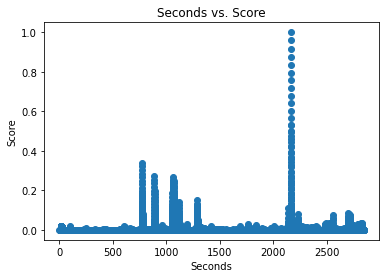

In [10]:
np.savetxt(f"{filename}_anomaly_scores.txt", anomaly_score)
norm(f"{filename}_anomaly_scores.txt", f"normalized_{filename}_anomaly_scores.txt") 
add_data(f"{filename}.csv", f"normalized_{filename}_anomaly_scores.txt", f"{filename}_modified.csv")
graph_data(f"{filename}_modified.csv")

## Find the AUC score

In [40]:
from sklearn import metrics
def auc(labelFile):
    data = pd.read_csv(labelFile, names=["label"])
    # data = data.head()

    methods = ["midasPrat"]
    for i in range(len(methods)):
        scores = pd.read_csv("anomaly_scores.txt", header=None, squeeze=True)
        fpr, tpr, _ = metrics.roc_curve(data.label, scores)
        auc = metrics.roc_auc_score(data.label, scores)
        print("TPR:", tpr)
        print("FPR:", fpr)

        print("AUC: ", auc)


In [41]:
auc("https://raw.githubusercontent.com/Stream-AD/MIDAS/master/data/DARPA/darpa_ground_truth.csv")

TPR: [0.00000000e+00 3.65335639e-07 1.07226010e-03 ... 9.99995616e-01
 9.99995616e-01 1.00000000e+00]
FPR: [0.         0.         0.         ... 0.9998184  0.99981895 1.        ]
AUC:  0.9175562291257859
